# Forward Propagation Code for a Sphere


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Physical constants
h        = 6.626e-34       # J.s: Planck's constant
c        = 2.99792458e8    # m/s: Speed of light

In [ ]:
# class Beam:
#     def __init__(self):
#         self.E      = 1.
#         self.lambda = h*c/self.E
#         self.freq   = self.E/h
#         self.dist   = 1.

In [4]:
def SphericalThickness(r,x,y):
    '''
    Returns thickness through sphere of radius r at a given (x,y)
    '''
    if x**2 + y**2 < r**2:
        return np.sqrt(r**2 - (x**2 + y**2)) * 2
    else:
        return 0.

    
    
def SphericalAttenuation_pw(r, Lx, Ly, nbins_x, nbins_y):
    '''
    Inputs:
        r       (float): radius
        Lx      (float): image field x-length
        Ly      (float): image field y-length
        nbins_x (int)  : number of x bins
        nbins_y (int)  : number of y bins
    Outputs:
        attenuated_wave (ndarray): xy grid of waveform values post-attenuation
    '''
    ## Physical constants
    h        = 6.626e-34       # J.s: Planck's constant
    c        = 2.99792458e8    # m/s: Speed of light

    ## Some APS-specific x-ray constants
    E0       = 9.61306e-16                           # J: incident x-ray energy (= 6keV)
    delta    = 1.2743e-5                             # δ for Carbon
    beta     = 3.8559e-8                             # β for Carbon
    k        = ( (2*np.pi*E0)/(h*c) ) * (1 - delta)  # Wave vector: Carbon
    kappa    = ( (2*np.pi*E0)/(h*c) ) * beta         # Extinction coefficient: Carbon
    K        = k + (1j * kappa)                      # Complex refractive index: Carbon

    ## Discretization parameters
    dx       = Lx/nbins_x      # Spacing between x grid-points
    dy       = Ly/nbins_y      # Spacing between y grid-points


    ## Initialize the attenuated wave as a uniform plane wave in the z direction
    attenuated_wave = np.full((nbins_x+1,nbins_y+1), np.exp(1j * K * radius), dtype = np.complex128)

    ## Multiply the wave in each grid-point by the appropriate attenuation factor
    for i in range(nbins_x + 1):
        x = (i - nbins_x/2) * dx       # maps index i to coordinate x
        for j in range(nbins_y + 1):
            y = (j - nbins_y/2) * dy       # maps index j to coordinate y
            t = SphericalThickness(radius,x,y)
            attenuated_wave[i,j] *= np.exp(-kappa*t)  # multiply plane wave in each bin by attenuation factor
    
    return attenuated_wave


def propagate(wave, d):
    '''
    Propagates a wave via convolution.
    '''
    ## Physical constants
    h        = 6.626e-34       # J.s: Planck's constant
    c        = 2.99792458e8    # m/s: Speed of light

    ## Some APS-specific x-ray constants
    E0       = 9.61306e-16                           # J: incident x-ray energy (= 6keV)
    delta    = 1.2743e-5                             # δ for Carbon
    beta     = 3.8559e-8                             # β for Carbon
    k        = ( (2*np.pi*E0)/(h*c) ) * (1 - delta)  # Wave vector: Carbon
    kappa    = ( (2*np.pi*E0)/(h*c) ) * beta         # Extinction coefficient: Carbon
    K        = k + (1j * kappa)                      # Complex refractive index: Carbon
    l        = h*c/E0
    
    dim = wave.shape
    wave2 = np.zeros((dim[0],dim[1]), dtype = np.complex128)
    for i in range(dim[0]):
        x = (i - nbins_x/2) * dx       # maps index i to coordinate x
        for j in range(dim[1]):
            y = (j - nbins_y/2) * dy       # maps index j to coordinate y
            wave2[i][j] += np.exp(-1j * k * (x**2 + y**2) / (2*d))
    
    propagated_wave = (-1j*np.exp(1j*k*d)/(l*d)) * signal.convolve2d(wave,wave2)
    
    return propagated_wave

(101, 101) (201, 201)


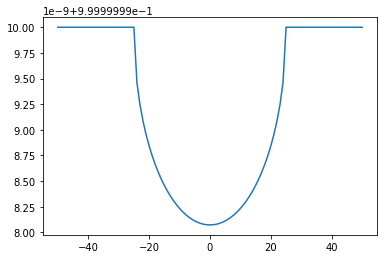

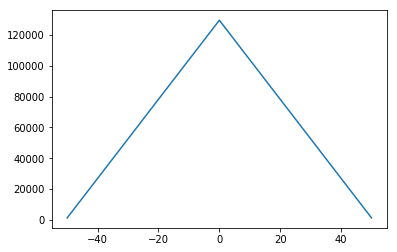

In [25]:
## Define some constants
h        = 6.626e-34       # J.s: Planck's constant
c        = 2.99792458e8    # m/s: Speed of light

## Some APS-specific x-ray constants
E0       = 9.61306e-16                           # J: incident x-ray energy (= 6keV)
delta    = 1.2743e-5                             # δ for Carbon
beta     = 3.8559e-8                             # β for Carbon
k        = ( (2*np.pi*E0)/(h*c) ) * (1 - delta)  # Wave vector: Carbon
kappa    = ( (2*np.pi*E0)/(h*c) ) * beta         # Extinction coefficient: Carbon
K        = k + (1j * kappa)                      # Complex refractive index: Carbon

## Geometry & discretization parameters
radius   = 25e-3           # m: sphere radius
d        = 250e-3          # m: camera distance from edge of sphere
Lx       = 100e-3          # m: image field x-length
Ly       = 100e-3          # m: image field y-length
nbins_x  = 100             # Number of x bins
nbins_y  = 100             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points


## Initialize the attenuated wave as a uniform plane wave in the z direction
# attenuated_wave = np.full((nbins_x+1,nbins_y+1), np.exp(1j * k * radius), dtype = np.complex128)
attenuated_wave = np.full((nbins_x+1,nbins_y+1), np.exp(1j * (1-delta) * radius), dtype = np.complex128)

## Multiply the wave in each grid-point by the appropriate attenuation factor
for i in range(nbins_x + 1):
    x = (i - nbins_x/2) * dx       # maps index i to coordinate x
    for j in range(nbins_y + 1):
        y = (j - nbins_y/2) * dy       # maps index j to coordinate y
        t = SphericalThickness(radius,x,y)    # sphere thickness at entry point (x,y)
#         attenuated_wave[i,j] *= np.exp(-kappa*t)  # multiply plane wave in each bin by attenuation factor
        attenuated_wave[i,j] *= np.exp(-beta*t)
    
x = np.array([(i - nbins_x/2)*dx for i in range(nbins_x + 1)])
y = np.array([(j - nbins_y/2)*dy for j in range(nbins_y + 1)])

dim = attenuated_wave.shape

wave2 = np.zeros((dim[0],dim[1]), dtype = np.complex128)
for i in range(dim[0]):
    x = (i - nbins_x/2) * dx       # maps index i to coordinate x
    for j in range(dim[1]):
        y = (j - nbins_y/2) * dy       # maps index j to coordinate y
        wave2[i][j] += np.exp(-1j * (1-delta) * (x**2 + y**2) / (2*d))

        
        
        

# l = k/(2*np.pi)
# propagated_wave = (-1j*np.exp(1j*k*d)/(l*d)) * signal.convolve2d(attenuated_wave, wave2)
l = (1-delta)/(2*np.pi)
propagated_wave = (-1j*np.exp(1j*(1-delta)*d)/(l*d)) * signal.convolve2d(attenuated_wave, wave2)

print(attenuated_wave.shape, propagated_wave.shape)

x = np.linspace(-nbins_x/2, nbins_x/2, dim[0])
plt.plot(x, np.abs(attenuated_wave[:,int(nbins_x/2)]))
plt.show()

x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]*2-1)
plt.plot(x, np.abs(propagated_wave[:,int(nbins_x/2)]))
plt.show()